<a href="https://colab.research.google.com/github/ChuztpahNDA/DO_AN/blob/master/CKPLUS_freeze_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/do an/thesis/CKPlus.zip' -d '/content/data'

In [ ]:
!cp '/content/drive/MyDrive/do an/thesis/train.py' 'train.py'
!unzip '/content/drive/MyDrive/do an/thesis/VGGFace2_DeepFace_weights_val-0.9034.h5.zip' -d '/content/'

Archive:  /content/drive/MyDrive/do an/thesis/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
  inflating: /content/VGGFace2_DeepFace_weights_val-0.9034.h5  


In [ ]:
# data
from glob import glob
from os.path import basename, dirname
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import seaborn as sns

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# model
import train 

In [ ]:
print('tensorflow',tf.__version__)
print('opencv', cv2.__version__)

tensorflow 2.4.1
opencv 4.1.2


In [ ]:
train_paths = glob('/content/data/CK+48/*/*.png')

In [ ]:
train_paths = np.array(train_paths)
np.random.shuffle(train_paths)
train_paths[:5]

array(['/content/data/CK+48/sadness/S066_004_00000010.png',
       '/content/data/CK+48/happy/S132_006_00000023.png',
       '/content/data/CK+48/surprise/S063_001_00000011.png',
       '/content/data/CK+48/happy/S130_013_00000013.png',
       '/content/data/CK+48/happy/S069_004_00000015.png'], dtype='<U50')

In [ ]:
dict_emotion = {
    'anger':0,
    'disgust':1,
    'fear':2,
    'happy':3,
    'sadness':4,
    'surprise':5,
    'contempt':6
}
X = [np.array(cv2.resize(cv2.imread(img), (152, 152), interpolation = cv2.INTER_AREA)) for img in train_paths]
Y = [dict_emotion[basename(dirname(path)).lower()] for path in train_paths]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    stratify=Y,
                                                    random_state=18,
                                                    test_size=0.05)

In [ ]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test,
                                                    y_test,
                                                    stratify=y_test,
                                                    random_state=18,
                                                    test_size=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

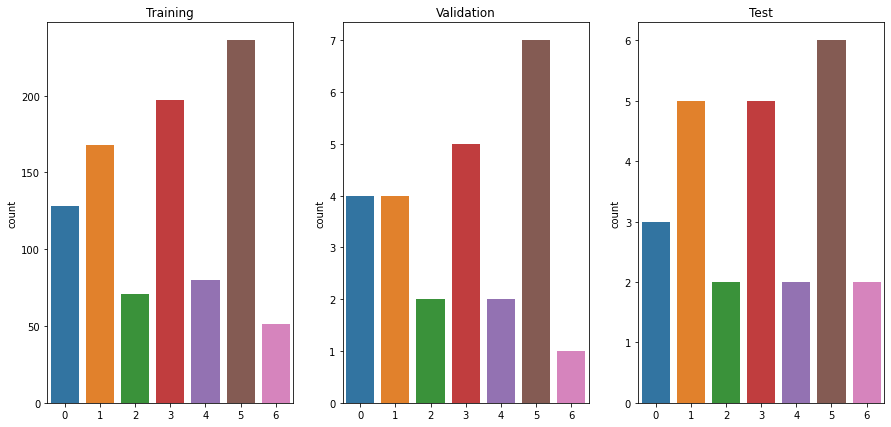

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(1, 3, 1)
sns.countplot(y_train);
plt.title("Training")

plt.subplot(1, 3, 2)
sns.countplot(y_valid);
plt.title("Validation")

plt.subplot(1, 3, 3)
sns.countplot(y_test);
plt.title("Test")

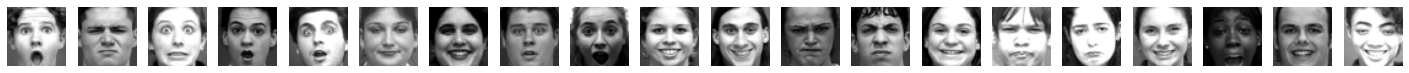

In [ ]:
plt.figure(figsize=(25,15))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

validation


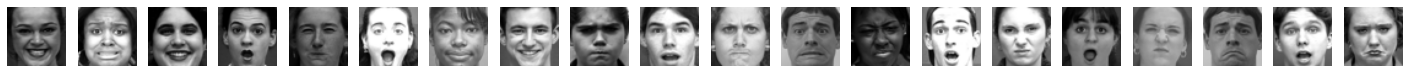

In [ ]:
print("validation")
plt.figure(figsize=(25,15))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(x_valid[i])
  plt.axis('off')

Test


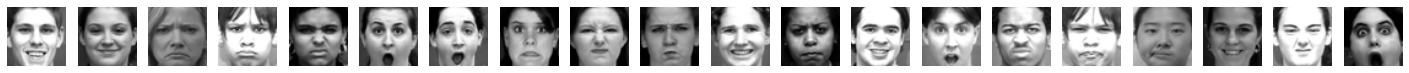

In [ ]:
print("Test")
plt.figure(figsize=(25,15))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(x_test[i])
  plt.axis('off')

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

x_test = np.array(x_test)
y_test = np.array(y_test)

print("train", x_train.shape, y_train.shape)
print("valid", x_valid.shape, y_valid.shape)
print("test", x_test.shape, y_test.shape)


train (931, 152, 152, 3) (931,)
valid (25, 152, 152, 3) (25,)
test (25, 152, 152, 3) (25,)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)
test_datagen.fit(x_valid)

In [ ]:
deepface_base = train.create_model()
deepface_base.load_weights('/content/VGGFace2_DeepFace_weights_val-0.9034.h5')

Model: "DeepFace"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 142, 142, 32)      11648     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 71, 71, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 63, 63, 16)        41488     
_________________________________________________________________
L4 (LocallyConnected2D)      (None, 55, 55, 16)        62774800  
_________________________________________________________________
L5 (LocallyConnected2D)      (None, 25, 25, 16)        7850000   
_________________________________________________________________
L6 (LocallyConnected2D)      (None, 21, 21, 16)        2829456   
_________________________________________________________________
F0 (Flatten)                 (None, 7056)              0  

In [ ]:
for layer in deepface_base.layers[:-4]:
  layer.trainable=False

In [ ]:
#transfer model
x = deepface_base.get_layer('D0').output
weight_deecay = Dense(1024, activation='relu', name = 'weight_decay_01', bias_regularizer=regularizers.l1(l1=1e-1))(x)
weight_deecay = Dense(256, activation='relu', name = 'weight_decay_02',bias_regularizer=regularizers.l1(l1=1e-1))(weight_deecay)
weight_deecay = Dense(128, activation='relu', name = 'weight_decay_03',bias_regularizer=regularizers.l1(l1=1e-2))(weight_deecay)
weight_deecay = Dropout(0.2)(weight_deecay)
output = Dense(7, activation='softmax', name='Prediction')(weight_deecay)

model = Model(inputs=deepface_base.input, outputs = output, name='Facial')
model.summary()

Model: "Facial"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
I0 (InputLayer)              [(None, 152, 152, 3)]     0         
_________________________________________________________________
C1 (Conv2D)                  (None, 142, 142, 32)      11648     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 71, 71, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 63, 63, 16)        41488     
_________________________________________________________________
L4 (LocallyConnected2D)      (None, 55, 55, 16)        62774800  
_________________________________________________________________
L5 (LocallyConnected2D)      (None, 25, 25, 16)        7850000   
_________________________________________________________________
L6 (LocallyConnected2D)      (None, 21, 21, 16)        28294

In [ ]:
%%time
n_epochs = 150
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=1e-5)
list_metrics = [SparseCategoricalAccuracy()]
model.compile(loss=loss_fn, optimizer=optimizer, metrics=list_metrics)

call_back = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint(
    '/content/drive/MyDrive/Thesis/model_CKPlus.h5',
    monitor = 'val_loss',
    save_weights_only=True,
    save_best_only=True,
    mode='min'
)

history_freeze = model.fit(train_datagen.flow(x_train, y_train, batch_size=32), 
                           epochs=n_epochs, 
                           validation_data=test_datagen.flow(x_valid, y_valid), 
                           callbacks=[call_back, check_point])

Epoch 1/150
30/30 [==============================] - 120s 1s/step - loss: 2.6054 - sparse_categorical_accuracy: 0.2032 - val_loss: 1.1952 - val_sparse_categorical_accuracy: 0.5200
Epoch 2/150
30/30 [==============================] - 5s 178ms/step - loss: 1.8788 - sparse_categorical_accuracy: 0.3594 - val_loss: 0.9192 - val_sparse_categorical_accuracy: 0.7200
Epoch 3/150
30/30 [==============================] - 5s 171ms/step - loss: 1.4961 - sparse_categorical_accuracy: 0.5031 - val_loss: 0.7756 - val_sparse_categorical_accuracy: 0.7200
Epoch 4/150
30/30 [==============================] - 5s 179ms/step - loss: 1.3040 - sparse_categorical_accuracy: 0.5675 - val_loss: 0.6732 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/150
30/30 [==============================] - 5s 172ms/step - loss: 1.1812 - sparse_categorical_accuracy: 0.5999 - val_loss: 0.5910 - val_sparse_categorical_accuracy: 0.8400
Epoch 6/150
30/30 [==============================] - 5s 173ms/step - loss: 1.0067 - sparse_categ

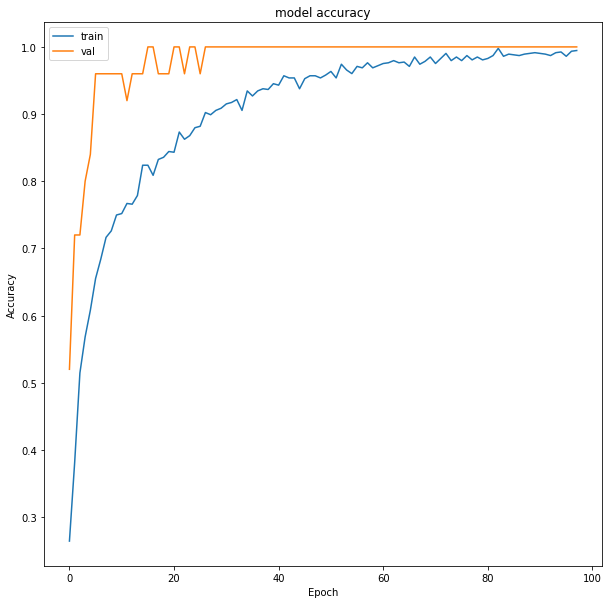

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history_freeze.history['sparse_categorical_accuracy'])
plt.plot(history_freeze.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

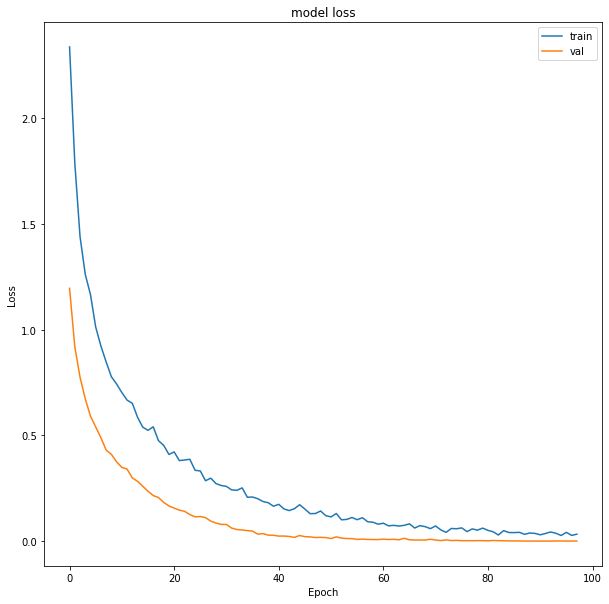

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history_freeze.history['loss'])
plt.plot(history_freeze.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
x_test = x_test/255.0

In [ ]:
model.load_weights('/content/drive/MyDrive/Thesis/model_CKPlus.h5')
predicts = model.predict(x_test)

In [ ]:
target = []
for pred in predicts:
  target.append(np.argmax(pred))

In [ ]:
print("F1_score: ", f1_score(y_test, target, average='micro'))

F1_score:  1.0


In [ ]:
dict_emo = {
    0:'anger',
    1:'disgust',
    2:'fear',
    3:'happy',
    4:'sadness',
    5:'surprise',
    6:'contempt'
}

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=target).numpy()
confusion_matrix = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

confusion_matrix = pd.DataFrame(confusion_matrix,
                                index = dict_emo.values(), 
                                columns = dict_emo.values())

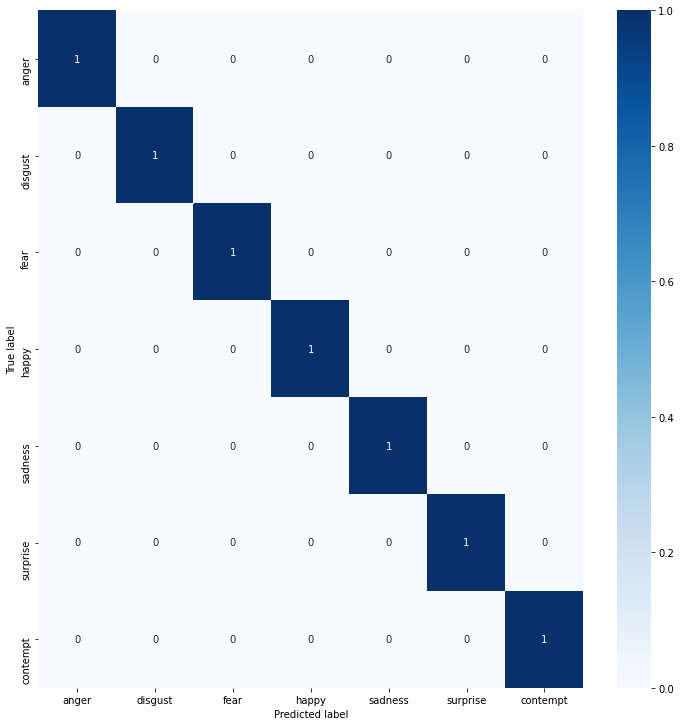

In [ ]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()